In [45]:
import numpy as np
import numpy.linalg as LA
from scipy import integrate
from itertools import product
from matplotlib import cm
import matplotlib.pyplot as plt

## Метод колокації

Маємо інтегральне рівняння вигляду

$$
\dots
$$

Наближений розв'язок будемо шукати у вигляді

 $$
 \tilde{\psi_k}(x)=\sum_{j=1}^{n} c^{(k)}_{j} \gamma^{(k)}_{j}(x), \quad k = 1,2
 $$

де $c_j$ - невідомі константи, які потрібно знайти, а $\gamma_j$ - задані лінійнонезалежні функції (в нашому випадку кусково аналітичні), $j = 1, ..., n$.

Розглянувши його на множині точок $x_i$, таких, що
$$
a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b
$$

отримаємо СЛАР відносно невідомих $с^{(k)}_j$, $j = 1, ..., n$. 

 $$
 A =
 \begin{pmatrix}
	 \begin{matrix}
	 	G^{(1)}_{11} & \dots  & G^{(1)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(1)}_{n1} & 		  & G^{(1)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
	 	G^{(2)}_{11} & \dots  & G^{(2)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(2)}_{n1} & 		  & G^{(2)}_{nn} \\
	 \end{matrix} \\
	 \begin{matrix}
		G^{(3)}_{11} & \dots  & G^{(3)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(3)}_{n1} & 		  & G^{(3)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
		G^{(4)}_{11} & \dots  & G^{(4)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(4)}_{n1} & 		  & G^{(4)}_{nn} \\
	 \end{matrix} \\
 \end{pmatrix}
 c = 
 \begin{pmatrix}
	c^{(1)}_1\\
	\vdots\\
	c^{(1)}_n\\
	c^{(2)}_1\\
	\vdots\\
	c^{(2)}_n\\
 \end{pmatrix}
 g = 
 \begin{pmatrix}
	2\pi g_1(x_1)\\
	\vdots\\
	2\pi g_1(x_n)\\
	2\pi g_2(x_1)\\
	\vdots\\
	2\pi g_2(x_n)\\
 \end{pmatrix}
 $$

For the full discretization of the integral equation of the first kind $(3.5),$ which has a logarithmic singularity, we apply a quadrature method together with the quadrature rule [13,14] based on trigonometric interpolation. For this purpose, we choose an equidistant mesh by setting $t_{i}:=i \pi / M, i=0, \ldots, 2 M-1, M \in \mathbb{N}$ and use the quadrature rules
 $$
 \begin{array}{c}
 	\frac{1}{2 \pi} \int_{0}^{2 \pi} f(\tau) d \tau \approx \frac{1}{2 M} \sum_{j=0}^{2 M-1} f\left(t_{j}\right) \\
 	 \int_{0}^{2 \pi} f(\tau) \ln \left(\frac{4}{e} \sin ^{2} \frac{t-\tau}{2}\right) d \tau \approx {2 \pi}\sum_{j=0}^{2 M-1} R_{j}(t) f\left(t_{j}\right)
 \end{array}
 $$
 with known weight functions $R_{j}$ (see [13]).
 
 $$
 R_{j}(t)=-\frac{1}{n} \sum_{m=1}^{n-1} \frac{1}{m} \cos m\left(t-t_{j}\right)+\frac{1}{2 n} \cos n\left(t-t_{j}\right)
 $$
 

In [2]:
a, b = 0, 2*np.pi

r1 = 0.9
r2 = 2
n = 24
eps = 1e-10
h = (b - a) / (n)
xx = [ h * i for i in range(n)]
xx

[0.0,
 0.2617993877991494,
 0.5235987755982988,
 0.7853981633974483,
 1.0471975511965976,
 1.308996938995747,
 1.5707963267948966,
 1.832595714594046,
 2.0943951023931953,
 2.356194490192345,
 2.617993877991494,
 2.8797932657906435,
 3.141592653589793,
 3.4033920413889422,
 3.665191429188092,
 3.926990816987241,
 4.1887902047863905,
 4.45058959258554,
 4.71238898038469,
 4.974188368183839,
 5.235987755982988,
 5.497787143782138,
 5.759586531581287,
 6.021385919380436]

In [3]:
x1 = lambda t: (r1*np.cos(t), r1*np.sin(t))
x2 = lambda t: (r2*np.cos(t), r2*np.sin(t))
dx1 = lambda t: (-r1*np.sin(t), r1*np.cos(t))
dx2 = lambda t: (-r2*np.sin(t), r2*np.cos(t))
ddx2 = lambda t: (-r2*np.cos(t), -r2*np.sin(t))

$$
K_{1}(t, \tau)=\frac{\left(\bar{x}_{1}(\tau)-\bar{x}_{2}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{\left|x_{2}(t)-x_{1}(\tau)\right|^{2}}
$$
$$
K_{2}(t, \tau)=\left\{\begin{array}{l}
\frac{\left(\bar{x}_{2}(\tau)-\bar{x}_{2}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{\left|x_{2}(t)-x_{2}(\tau)\right|^{2}}, \quad \text { Якщо } t \neq \tau \\
\frac{\left(\bar{x}_{2}^{\prime \prime}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{2\left|x_{2}^{\prime}(t)\right|^{2}}, \quad \text { якщо } t=\tau
\end{array}\right.
$$


In [5]:
def nu_x2(t):
    return np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))

def K11_1(t, tau):
    return -1/2

def K11_2(t, tau):
    if np.abs(t - tau) > eps:
        return 1/2*np.log( 4/np.e * np.sin((t - tau)/2)**2 \
                 / LA.norm(np.subtract(x1(t), x1(tau)))**2)
    else:
        return 1/2*np.log(1/(np.e * LA.norm(dx1(t))**2))

def K12(t, tau):
    return np.log(1/(LA.norm(np.subtract(x1(t), x2(tau)))))

def K21(t, tau):
    return np.dot(np.subtract(x1(tau), x2(t)), nu_x2(t)) \
            / LA.norm(np.subtract(x2(t), x1(tau)))**2

def K22(t, tau):
    if np.abs(t - tau) > eps:
        return np.dot(np.subtract(x2(tau), x2(t)), nu_x2(t)) \
                / LA.norm(np.subtract(x2(t), x2(tau)))**2
    else:
        return np.dot(ddx2(t), nu_x2(t)) / ((2*LA.norm(dx2(t)))**2)


In [6]:
def basicFunction(j, x, xx=xx, h=h):
    xx = xx.copy()
    n = len(xx) - 1
    
    if j >=1 and xx[j-1] <= x <= xx[j]:
        return (x - xx[j-1])/h
    elif j <= n-1 and xx[j] <= x <= xx[j+1]:
        return (xx[j+1] - x)/h
    else:
        return 0

In [7]:
def quadrature_with_ln_special_case(f, M=n):
    '''integral from 0 to 2pi'''

    tt = [i*np.pi/M for i in range(2*M)]

    R = lambda i, t: -1/(2*M) * (1
                                 + 2*sum([(1/m) * np.cos(m * (t - tt[i])) for m in range(1, M)])
                                 + 1/(M) * np.cos(t - tt[i]))
  
    def integral(t):
        return sum([R(j,t)*f(tt[j]) for j in range(2*M)])
  
    return integral

In [28]:
def Collocation(xx):
    xx = xx.copy()
    n = len(xx)
    
    def collocate(K, term=lambda j, x: 0):
        A = np.zeros([n, n])

        for i in range(n):
            for j in range(n):
                Kxi_li = lambda s: K(xx[i], s) * basicFunction(j, s)

                if (j == 0):
                    (quad, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
                elif (j == n - 1):
                    (quad, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
                else:
                    (quad, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])

                A[i][j] = quad + term(j, xx[i])
            
        return A
    
    return collocate

In [9]:
def collocate_G1(xx):
    xx = xx.copy()
    n = len(xx)

    G1 = np.zeros((n,n)).tolist()
    for i in range(n):
        for j in range(n):

            Kxi_li = lambda s: K11_2(xx[i], s) * basicFunction(j, s)

            K_1 = 2 * np.pi * quadrature_with_ln_special_case(lambda s: K11_1(xx[i], s)*basicFunction(j, s))(xx[i])

            if (j == 0):
                (K_2, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
            elif (j == n - 1):
                (K_2, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
            else:
                (K_2, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])

            G1[i][j] = K_1 + K_2

    return G1

In [ ]:
# h = (b - a) / (n-1)
# xx = [ h * i for i in range(n)]
# del xx[-1]
# n = len(xx)

In [24]:
def solve(xx, g1, g2, jump_g3, jump_g4, notify=False):
    collocate = Collocation(xx)
  
    if notify:
      print('Computing G1 ...')
    G1 = collocate_G1(xx)
    
    if notify:
      print('Computing G2 ...')
    G2 = collocate(K12)
    
    if notify:
      print('Computing G3 ...')
    G3 = collocate(K21, term=jump_g3)
    
    if notify:
      print('Computing G4 ...')
    G4 = collocate(K22, term=jump_g4)
    
    A = np.concatenate((np.concatenate((G1, G2), axis=1),
                     np.concatenate((G3, G4), axis=1)), axis=0)
    
    g = np.concatenate(([[g1(xx[j])] for j in range(n)],
                        [[g2(xx[j])] for j in range(n)]))
    
    if notify:
      print('Solving system ...')
    c = LA.solve(A, 2*np.pi*g)
    
    
    
    def psi1_approx(t, c=c):
        return sum(c[i][0]*basicFunction(i, t) for i in range(n))

    def psi2_approx(t, c=c):
        return sum(c[n + i][0]*basicFunction(i, t) for i in range(n))
    
    K1 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x1(tau))))
    K2 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x2(tau))))

    def u_approx(x, n=n, a=a, b=b):
        mesh = np.linspace(a, b, n)

        under_int_f1 = lambda tau: psi1_approx(tau)*K1(x, tau)
        under_int_f2 = lambda tau: psi2_approx(tau)*K2(x, tau)

        return 1/(2*np.pi)*(
                integrate.trapz([under_int_f1(m) for m in mesh], x=mesh)
              + integrate.trapz([under_int_f2(m) for m in mesh], x=mesh)
        )
    
    if notify:
      print('Done: solution found.')
    
    return u_approx

In [43]:
def show(show3D=False):
    xxx = np.linspace(0, 2*np.pi, 100)
    yyy = np.linspace(0, 2*np.pi, 100)

    xxxx=np.linspace(-r2, r2, 100)
    zzzz=np.linspace(0, r2, 100)
    Xc, Zc=np.meshgrid(xxxx, zzzz)
    Yc = np.sqrt(1-Xc**2)

    a_ = -r2
    b_ = r2
    n_ = 20

    x = np.linspace(a_, b_, n_)
    y = np.linspace(a_, b_, n_)
    xx_, yy_ = np.meshgrid(x, y)

    u_approx([0, 0])

    zz_ = np.zeros([n_, n_])

    for i, x_ in enumerate(x):
        for j, y_ in enumerate(y):
            zz_[i][j] = u_approx([x[i], y[j]])
            #zz_[i][j] = u(x[i], y[j])

    fig_contour,ax=plt.subplots(1,1)

    ax.plot(x1(xxx)[0], x1(xxx)[1])
    ax.plot(x2(xxx)[0], x2(xxx)[1])


    cp = ax.contourf(xx_, yy_, zz_)
    fig_contour.colorbar(cp) # Add a colorbar to a plot
    plt.show()
    
    if(show3D):
        %matplotlib notebook
        fig = plt.figure(figsize=(5, 5))
        ax = fig.gca(projection='3d')

        # surf = ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1)

        #fig.colorbar(surf, shrink=0.5, aspect=10)
        surf = ax.plot_surface(xx_, yy_, zz_, rstride=1, cstride=1, linewidth=1, antialiased=False, cmap=cm.cividis)


        rstride = 10
        cstride = 10
        # ax.plot_surface(Xc, Yc, Zc, alpha=0.8, rstride=rstride, cstride=cstride)
        # ax.plot_surface(Xc, -Yc, Zc, alpha=0.8, rstride=rstride, cstride=cstride)

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        plt.show()
    

In [49]:
g1 = lambda t: 1
g2 = lambda t: 0

u = lambda x, y : 1

In [19]:
def g1(t):
    x, y = x1(t)
    return x

def g2(t):
    x, y = x2(t)
    v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
    grad = np.array([1, 0])
    return np.dot(grad, v)


u = lambda x, y : x

In [4]:
def g1(t):
    x, y = x1(t)
    return x**2

def g2(t):
    x, y = x2(t)
    v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
    grad = np.array([2*x, 0])
    return np.dot(grad, v) 


u = lambda x, y : x**2

In [27]:
def g1(t):
    x, y = x1(t)
    return x**2 - y**2

def g2(t):
    x, y = x2(t)
    v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
    grad = np.array([2*x, 2*y])
    return np.dot(grad, v)


u = lambda x, y : x**2 - y**2

In [50]:
jump_g3 = lambda j, x: -np.pi * basicFunction(j, x) / LA.norm(dx1(x))
jump_g4 = lambda j, x: np.pi * basicFunction(j, x) / LA.norm(dx2(x))

u_approx = solve(xx, g1, g2, jump_g3, jump_g4, notify=True)

Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-43-82396dc9da2d>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


<IPython.core.display.Javascript object>


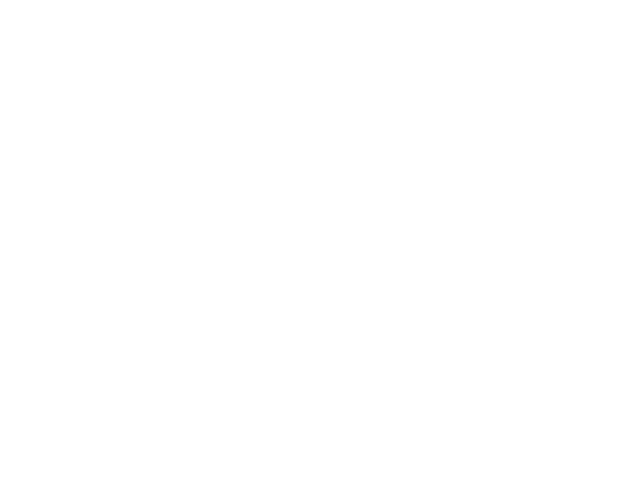

<IPython.core.display.Javascript object>


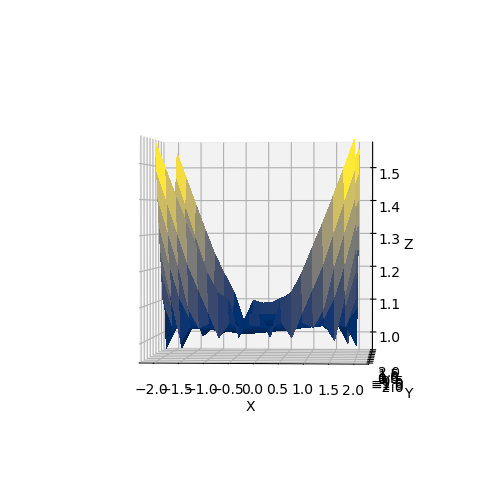

In [51]:
show(show3D=True)

In [ ]:
# saddle, term with i
#    very good                      with spikes
# (0, 1)(1, 1)(-1, 1)         (0, -1)(1, -1)(-1, -1)

# saddle, term with j
# smt looks like true
# (-1, 1)

# slope, term with i
#    very good                      with spikes
# 

# slope, term with j
#   very good                shit with logic
# (0, 1)(-1, 1)   (1, 1)  (0, -1)(-1, -1)


In [39]:
assert(False)

(0, 0)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


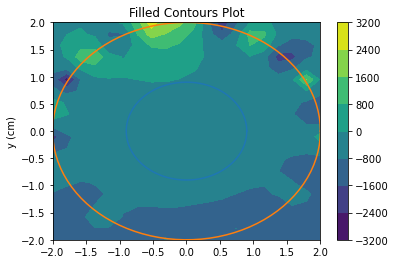

(0, 1)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


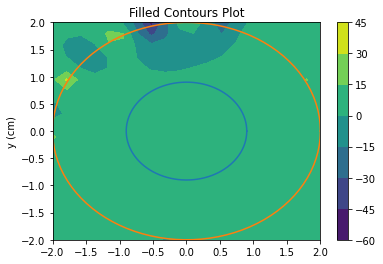

(0, -1)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


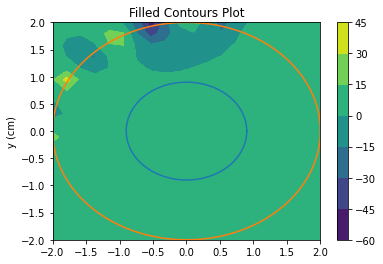

(1, 0)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


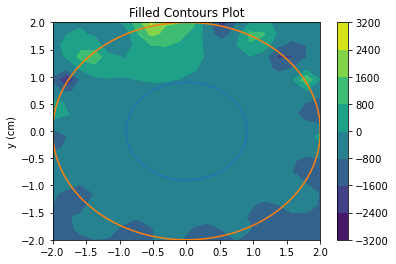

(1, 1)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


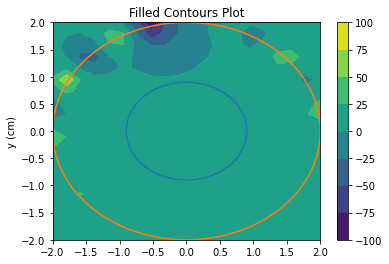

(1, -1)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


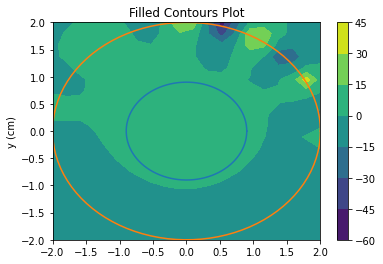

(-1, 0)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


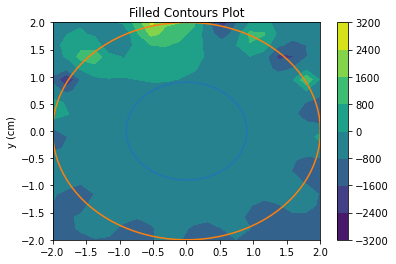

(-1, 1)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


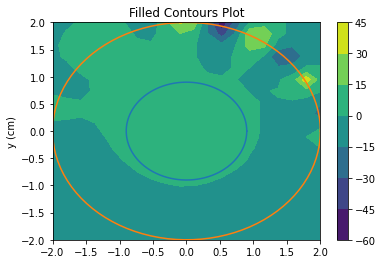

(-1, -1)
Computing G1 ...
Computing G2 ...
Computing G3 ...
Computing G4 ...
Solving system ...
Done: solution found.


<ipython-input-25-0852499ad200>:8: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


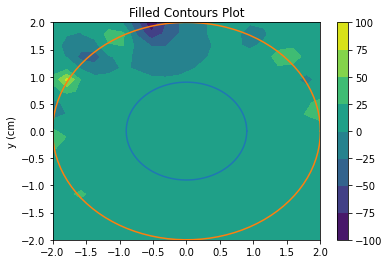

In [26]:
for i in list(product([0, 1, -1], repeat=2)):
  print(i)
  
  jump_g3 = lambda j, x: i[0]*np.pi * basicFunction(j, x) / LA.norm(dx1(x))
  jump_g4 = lambda j, x: i[1]*np.pi * basicFunction(j, x) / LA.norm(dx2(x))
  
  u_approx = solve(xx, g1, g2, jump_g3, jump_g4, notify=True)
  show()

In [ ]:
p=r1 + (r2-r1)/2
print(u(p,p), u_approx([p,p]))


In [ ]:
assert(False)

In [ ]:
[print(np.round(G1[i], 8)) for i in range(n)]

In [ ]:
[print(np.round(G2[i], 8)) for i in range(n)]

In [ ]:
[print(np.round(G3[i], 8)) for i in range(n)]

In [ ]:
[print(np.round(G4[i], 15)) for i in range(n)]